# Cargar librerías y paquetes

In [81]:
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import funciones as funciones

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, mean_squared_error, get_scorer_names, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor
from sklearn.metrics import r2_score

import plotly.express as px
import ipywidgets as widgets

from IPython.display import display

from scipy.stats import randint, uniform

import joblib  ### para guardar modelos
import openpyxl
#import a_funciones as funciones  #en caso de usar funcion # para llamarlo en visual Studio

#Despliegeue con dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [83]:
# Se carga la base de datos creada anteriormente
file_path = 'BD_fallasN.csv'

# Lee el archivo CSV especificando el códec
BD_fallas = pd.read_csv(file_path, encoding='latin1')

# Muestra las primeras filas del DataFrame
BD_fallas.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida sin desgaste en mm2 (RODILLO),Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,No conformidad,Porcentaje de no conformidad
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.980,177.8,6.0,Desgaste,0.980
1,54312,23311,890100251,1018018,"CDNA FB 864-K443-C2-P7""",4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ElongaciÃ³n,1.680
2,66729,27177,860009808,30179097,"CDNA FB-6830-K2-C2 P 6""",4500556454,EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ElongaciÃ³n,0.260
3,67135,27380,860009808,30321162D,PTNA INT ADIT 9.5X152X349,E-MAIL 02/11/2021,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,4,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286
4,67133,27380,860009808,30321162B,PTNA CAB 9.5X78X349,E-MAIL 02/11/2021,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286


In [84]:
BD_fallas.columns

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'PaÃ­s', 'Ciudad', 'Tipo de equipo', 'Pedido NÃÂ°', 'Material',
       'Causa de desgaste', 'Si escogiÃ³ otros, Â¿cuÃ¡l?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongaciÃ³n actual % (CADENA)',
       'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)',
       'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de des

In [85]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar = [
    'ConsecutivoOP', 'Producto','ConsecPedido', 'Cliente', 'OCCliente', 'SecAct', 'estado',
    'TipoConsecutivo', 'Pedido NÃÂ°', 'Medida referencia de control desgaste nueva en mm (CADENA)', 
    'Medida referencia control de desgaste actual en mm (CADENA)', 'Porcentaje de elongaciÃ³n actual % (CADENA)', 
    'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)', 'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)', 
    'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)', 'Porcentaje de desgaste actual % (BUJE)', 
    'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)', 
    'Porcentaje de desgaste actual % (PASADOR)', 'Medida sin desgaste en mm2 (RODILLO)', 
    'Medida actual en mm2 (RODILLO)', 'Porcentaje de desgaste actual % (RODILLO)', 
    'Altura de la platina en mm', 'Medida actual de la platina en mm (PLATINA)', 
    'Porcentaje de desgaste actual % (PLATINA)', 'Paso en mm', 'Cantidad de pasos'
]

# Generar un nuevo DataFrame eliminando las columnas especificadas
BD_fallasC = BD_fallas.drop(columns=columnas_a_eliminar)

# Verificar las primeras filas del nuevo DataFrame para asegurarte que se eliminaron correctamente
print(BD_fallasC.head())


                NombProducto Actividad  \
0        PTNA INT 16X103X301     CORT2   
1    CDNA FB 864-K443-C2-P7"      ENSA   
2   CDNA FB-6830-K2-C2 P 6"       EMPA   
3  PTNA INT ADIT 9.5X152X349      ENDE   
4        PTNA CAB 9.5X78X349     CORT2   

                                      RecMAQ              RecHOM  \
0                          OXICORTE Y PLASMA              CORTAR   
1                            PRENSA ANCLAJES             FORJADO   
2                  BANCO DE TRABAJO DESPACHO  PRODUCTO TERMINADO   
3  PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS             FORJADO   
4                          OXICORTE Y PLASMA              CORTAR   

  FechEstInicil Fecha de visita Empresa    Planta     PaÃ­s    Ciudad  \
0    2021-08-03      2022-12-05  HOLCIM     NOBSA  COLOMBIA    BOYACA   
1    2019-01-25      2022-03-15   ARGOS  SOGAMOSO  COLOMBIA  SOGAMOSO   
2    2021-10-02      2023-07-07  HOLCIM       NaN  COLOMBIA    BOYACA   
3    2021-11-04      2022-12-05  HOLCIM    BOY

In [86]:
# Observar el DF
BD_fallasC.head()

,NombProducto,Actividad,RecMAQ,RecHOM,FechEstInicil,Fecha de visita,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,2021-08-03,2022-12-05,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,2019-01-25,2022-03-15,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,2021-10-02,2023-07-07,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286


In [87]:
# Se verifica el tipo de variable
BD_fallasC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NombProducto                          47 non-null     object 
 1   Actividad                             47 non-null     object 
 2   RecMAQ                                47 non-null     object 
 3   RecHOM                                47 non-null     object 
 4   FechEstInicil                         47 non-null     object 
 5   Fecha de visita                       47 non-null     object 
 6   Empresa                               47 non-null     object 
 7   Planta                                46 non-null     object 
 8   PaÃ­s                                 47 non-null     object 
 9   Ciudad                                47 non-null     object 
 10  Tipo de equipo                        47 non-null     object 
 11  Material             

In [88]:
# cambio de formato de fecha

# Convertir las columnas 'FechEstInicil' y 'Fecha de visita' a formato datetime
BD_fallasC['FechEstInicil'] = pd.to_datetime(BD_fallasC['FechEstInicil'], errors='coerce')
BD_fallasC['Fecha de visita'] = pd.to_datetime(BD_fallasC['Fecha de visita'], errors='coerce')

# Crear una nueva columna 'Tiempo hasta falla' que sea la diferencia en días entre 'FechEstInicil' y 'Fecha de visita'
BD_fallasC['Tiempo hasta falla (Dias)'] = (BD_fallasC['Fecha de visita'] - BD_fallasC['FechEstInicil']).dt.days

# Verificar las primeras filas para asegurarse de que todo esté correcto
BD_fallasC.head()


,NombProducto,Actividad,RecMAQ,RecHOM,FechEstInicil,Fecha de visita,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,2021-08-03,2022-12-05,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,2019-01-25,2022-03-15,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,2021-10-02,2023-07-07,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [89]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar2 = [
    'FechEstInicil', 'Fecha de visita'
]

# Generar un nuevo DataFrame eliminando las columnas especificadas
BD_fallasD = BD_fallasC.drop(columns=columnas_a_eliminar2)

# Verificar las primeras filas del nuevo DataFrame para asegurarte que se eliminaron correctamente
BD_fallasD.head()


,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [90]:
# Verificación de nulos
print("\nNúmero de datos faltantes por columna:")
print(BD_fallasD.isnull().sum())


Número de datos faltantes por columna:
NombProducto                             0
Actividad                                0
RecMAQ                                   0
RecHOM                                   0
Empresa                                  0
Planta                                   1
PaÃ­s                                    0
Ciudad                                   0
Tipo de equipo                           0
Material                                 0
Causa de desgaste                        6
Si escogiÃ³ otros, Â¿cuÃ¡l?             11
Escoja el desgaste donde se presenta     0
Tipo de cadena                           0
Referencia cadena                        0
No conformidad                           0
Porcentaje de no conformidad             0
Tiempo hasta falla (Dias)                0
dtype: int64


In [91]:
# Rellenar los valores nulos con la cadena 'No Aplica'
BD_fallasD = BD_fallasD.fillna('No Aplica')

# Verificar las primeras filas para asegurarte que los nulos fueron reemplazados
BD_fallasD.head()

,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [92]:
# Renombrar las columnas mal escritas
BD_fallasD = BD_fallasD.rename(columns={
    'PaÃ­s': 'País',
    'Si escogiÃ³ otros, Â¿cuÃ¡l?': 'Si escogió otros, ¿cuál?'
})

# Verificar las primeras filas para asegurarte de que las columnas fueron renombradas
BD_fallasD.head()

,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [93]:
# Verificamos nulos nuevamente
print("\nNúmero de datos faltantes por columna:")
print(BD_fallasD.isnull().sum())


Número de datos faltantes por columna:
NombProducto                            0
Actividad                               0
RecMAQ                                  0
RecHOM                                  0
Empresa                                 0
Planta                                  0
País                                    0
Ciudad                                  0
Tipo de equipo                          0
Material                                0
Causa de desgaste                       0
Si escogió otros, ¿cuál?                0
Escoja el desgaste donde se presenta    0
Tipo de cadena                          0
Referencia cadena                       0
No conformidad                          0
Porcentaje de no conformidad            0
Tiempo hasta falla (Dias)               0
dtype: int64


In [94]:
# eliminar variables que no se necesitan
BD_fallasD = BD_fallasD.drop(['Actividad','RecMAQ','RecHOM'], axis=1)
BD_fallasD.head()

,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [95]:
# Función personalizada para revisar y reemplazar los valores de la columna 'NombProducto'
def reemplazar_producto(nombre):
    if 'PTNA' in nombre:
        return 'PLATINA'
    elif 'BUJE' in nombre:
        return 'BUJE'
    elif 'CDNA' in nombre:
        return 'CADENA'
    elif 'PASADOR' in nombre:
        return 'PASADOR'
    elif 'RODILLO' in nombre:
        return 'RODILLO'
    else:
        return nombre  # Si no coincide con ninguna palabra, mantener el valor original

# Aplicar la función a la columna 'NombProducto'
BD_fallasD['NombProducto'] = BD_fallasD['NombProducto'].apply(reemplazar_producto)

# Verificar las primeras filas para asegurarte de que los cambios se realizaron correctamente
BD_fallasD.head()


,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,CADENA,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [96]:
# Analizar valores unicos de variables mal escritas o con problemas numericos 

# Para los valores únicos de cada columna
valores_causa_desgaste = BD_fallasD['Causa de desgaste'].unique()
valores_no_conformidad = BD_fallasD['No conformidad'].unique()
valores_tiempo_hasta_falla = BD_fallasD['Tiempo hasta falla (Dias)'].unique()

# Imprimir resultados
print("Valores únicos en 'Causa de desgaste':", valores_causa_desgaste)
print("Valores únicos en 'No conformidad':", valores_no_conformidad)
print("Valores únicos en 'Tiempo hasta falla (Dias)':", valores_tiempo_hasta_falla)


Valores únicos en 'Causa de desgaste': ['ElongaciÃ³n prematura;DesalineaciÃ³n;Otros'
 'ElongaciÃ³n prematura;CavitaciÃ³n seca' 'DesalineaciÃ³n'
 'ElongaciÃ³n prematura;Otros' 'CavitaciÃ³n seca' 'Otros'
 'DesalineaciÃ³n;ElongaciÃ³n prematura;Otros;Falta de lubricaciÃ³n;Ruptura'
 'Velocidad incorrecta;DesalineaciÃ³n'
 'DesalineaciÃ³n;CavitaciÃ³n seca;Otros' 'No Aplica'
 'Medidas fuera de especificaciÃ³n' 'Ruptura' 'ElongaciÃ³n prematura'
 'Falta de lubricaciÃ³n']
Valores únicos en 'No conformidad': ['Desgaste' 'ElongaciÃ³n']
Valores únicos en 'Tiempo hasta falla (Dias)': [ 489 1145  643  396  883  982  278  499  276  343  -19 -181  196  178
  426  342  846 -140  894  522  592  521  806  166  -45]


In [97]:
# Corrección de valores mal escritos
# Diccionario de correcciones para 'No conformidad'
correcciones_no_conformidad = {
    'ElongaciÃ³n': 'Elongación',
    'Desgaste': 'Desgaste'  # Asegúrate de incluir otras posibles variaciones aquí
}

# Diccionario de correcciones para 'Causa de desgaste'
correcciones_causa_desgaste = {
    'ElongaciÃ³n prematura': 'Elongación prematura',
    'DesalineaciÃ³n': 'Desalineación',
    'CavitaciÃ³n seca': 'Cavitación seca',
    'Falta de lubricaciÃ³n': 'Falta de lubricación',
    'Medidas fuera de especificaciÃ³n': 'Medidas fuera de especificación',
    'Ruptura': 'Ruptura',
    'Velocidad incorrecta': 'Velocidad incorrecta',
    'Otros': 'Otros',
    'No Aplica': 'No Aplica'
}

# Aplicar las correcciones en ambas columnas
BD_fallasD['No conformidad'] = BD_fallasD['No conformidad'].replace(correcciones_no_conformidad)
BD_fallasD['Causa de desgaste'] = BD_fallasD['Causa de desgaste'].replace(correcciones_causa_desgaste, regex=True)

# Verificar los cambios
print("Valores únicos corregidos en 'No conformidad':", BD_fallasD['No conformidad'].unique())
print("Valores únicos corregidos en 'Causa de desgaste':", BD_fallasD['Causa de desgaste'].unique())


Valores únicos corregidos en 'No conformidad': ['Desgaste' 'Elongación']
Valores únicos corregidos en 'Causa de desgaste': ['Elongación prematura;Desalineación;Otros'
 'Elongación prematura;Cavitación seca' 'Desalineación'
 'Elongación prematura;Otros' 'Cavitación seca' 'Otros'
 'Desalineación;Elongación prematura;Otros;Falta de lubricación;Ruptura'
 'Velocidad incorrecta;Desalineación'
 'Desalineación;Cavitación seca;Otros' 'No Aplica'
 'Medidas fuera de especificación' 'Ruptura' 'Elongación prematura'
 'Falta de lubricación']


In [98]:
# Correción de valores negativos
# Convertir todos los valores a su valor absoluto en la columna 'Tiempo hasta falla (Dias)'
BD_fallasD['Tiempo hasta falla (Dias)'] = BD_fallasD['Tiempo hasta falla (Dias)'].abs()

# Verificar los cambios
print("Valores únicos en 'Tiempo hasta falla (Dias)' (convertidos a positivos):", BD_fallasD['Tiempo hasta falla (Dias)'].unique())


Valores únicos en 'Tiempo hasta falla (Dias)' (convertidos a positivos): [ 489 1145  643  396  883  982  278  499  276  343   19  181  196  178
  426  342  846  140  894  522  592  521  806  166   45]


In [99]:
BD_fallasD.head()

,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,Elongación,1.680,1145
2,CADENA,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,Desalineación,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,Elongación,0.260,643
3,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [100]:
# Para obtener los valores únicos de todas las columnas en BD_fallasD
for column in BD_fallasD.columns:
    unique_values = BD_fallasD[column].unique()
    print(f"Valores únicos en '{column}':\n", unique_values, "\n")


Valores únicos en 'NombProducto':
 ['PLATINA' 'CADENA' 'BUJE' 'RODILLO' 'PASADOR'] 

Valores únicos en 'Empresa':
 ['HOLCIM' 'ARGOS' 'MANUELITA' 'CEMEX' 'INGENIO MANUELITA'
 'HOLCIM COLOMBIA' 'INGENIO RISARALDA'] 

Valores únicos en 'Planta':
 ['NOBSA' 'SOGAMOSO' 'No Aplica' 'BOYACA' 'HERMOSILLO' 'ZONA FRANCA'
 'MERIDA' 'PALMAR DE ALTAMIRA' 'CALZADA LARGA' 'TECOMÃ\x83Â\x81N'
 'PAZ DEL RIO' 'COLOMBIA' 'HOLCIM COLOMBIA - NOBSA' 'HOLCIM COLOMBIA'
 'RISARALDA'] 

Valores únicos en 'País':
 ['COLOMBIA' 'MEXICO' 'PANAMÃ\x81'] 

Valores únicos en 'Ciudad':
 ['BOYACA' 'SOGAMOSO' 'HERMOSILLO' 'CARTAGENA' 'MERIDA' 'CALI' 'CAIMITILLO'
 'COLIMA' 'NOBSA' 'BOYACÃ\x83Â\x81' 'BALBOA'] 

Valores únicos en 'Tipo de equipo':
 ['Elevador cangilones' 'Reclamador y apilador' 'Tansportador de tablilla'] 

Valores únicos en 'Material':
 ['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA' 'CORRECTORES'
 'CAÃ\x91A' 'COMBUSTIBLES ALTERNOS' 'CEMENTO' 'CARBÃ\x93N GRANULADO'
 'HARINA CRUDA'] 

Valores único

In [101]:
# Se verifican valores unicos
BD_fallasD['NombProducto'].unique

<bound method Series.unique of 0     PLATINA
1      CADENA
2      CADENA
3     PLATINA
4     PLATINA
5        BUJE
6     PLATINA
7     RODILLO
8        BUJE
9      CADENA
10    PASADOR
11     CADENA
12     CADENA
13    RODILLO
14       BUJE
15     CADENA
16    PLATINA
17       BUJE
18     CADENA
19       BUJE
20    PLATINA
21       BUJE
22    PASADOR
23       BUJE
24     CADENA
25    PASADOR
26    PASADOR
27       BUJE
28       BUJE
29       BUJE
30    PLATINA
31       BUJE
32     CADENA
33       BUJE
34     CADENA
35     CADENA
36    PASADOR
37     CADENA
38     CADENA
39    PLATINA
40    PLATINA
41    PASADOR
42     CADENA
43    PASADOR
44     CADENA
45       BUJE
46     CADENA
Name: NombProducto, dtype: object>

In [102]:
# Verificación de tamaño
BD_fallasD.shape

(47, 15)

In [103]:
# Remosión de outliers 
# Lista de valores a eliminar
valores_a_eliminar = [18.69, 6.11, 9.48, 4.97, 4, 3.38, 3.25, 3.09]

# Filtrar el DataFrame para eliminar filas con esos valores en 'Porcentaje de no conformidad'
BD_fallasD = BD_fallasD[~BD_fallasD['Porcentaje de no conformidad'].isin(valores_a_eliminar)]

# Verificar que se eliminaron las filas
print("Valores únicos en 'Porcentaje de no conformidad':", BD_fallasD['Porcentaje de no conformidad'].unique())


Valores únicos en 'Porcentaje de no conformidad': [0.98  1.68  0.26  0.286 1.1   2.    0.14  1.25  0.47  0.18  2.3   0.45
 0.61  0.31  0.58  0.22  0.    0.92  0.32  0.11  1.77  0.34  0.36  0.88
 0.38  0.5  ]


In [104]:
BD_fallasD.head()

,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,Elongación,1.680,1145
2,CADENA,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,Desalineación,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,Elongación,0.260,643
3,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [123]:
BD_fallasD['Tipo de cadena'].unique()

array(['CDNA FB984-ADITK443-C2-P7"', 'CDNA FB864-K443-C2-P7',
       'CDNA FB-6830-K2-C2 P 6" ', 'CDNA FB311-TK1-C2-P250',
       'CDNA ELEVADOR FB 994-K443-C2-P7"',
       'CDNA ELEVADOR FB AU06.3 C2 P7', 'CDNA FB TRANS AU8076-C5-P250',
       'CDNA FB 311-TK1-C2-P250', 'CDNA FB 833-K2-C3-P6',
       'CDNA FB2198-C6-P6"', 'CDNA ELEVADOR FB 984-K443-C2-P7"',
       'CDNA FB 956-K24-C2-P6"', 'ER 857-K44', 'CDNA FB 864-K443-C2-P7"',
       'CDNA FB-SJM-984', 'CDNA FB 2648-P12"',
       'CDNA FB 984 ADIT K443-C2-P7"', 'CDNA ELEV FB 26200-G4-C2-P200',
       'CDNA FB 6830-K2-C2 P 6" '], dtype=object)

In [122]:
BD_fallasD['Referencia cadena'].unique()

array(['FB984', 'FB864', 'FB-683', 'FB311', 'FB 994', 'FB AU06.3',
       'FB 8076 ', 'FB425', 'FB 833', 'FB2198', 'FB 984', 'FB 956',
       'ER 857', 'FB 864', 'FB-SJM-984', 'FB 2648', 'FB 984 ', 'FB 26200',
       'FB 6830'], dtype=object)

# Convertir a Dummies

In [106]:
df_dummies = BD_fallasD.copy()

In [107]:
# Identificar las columnas categóricas
cat = df_dummies.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat:
    unique_categories = df_dummies[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "NombProducto": ['PLATINA' 'CADENA' 'BUJE' 'PASADOR']
Categorías en "Empresa": ['HOLCIM' 'ARGOS' 'CEMEX' 'MANUELITA' 'INGENIO MANUELITA'
 'HOLCIM COLOMBIA']
Categorías en "Planta": ['NOBSA' 'SOGAMOSO' 'No Aplica' 'BOYACA' 'HERMOSILLO' 'MERIDA'
 'CALZADA LARGA' 'PALMAR DE ALTAMIRA' 'TECOMÃ\x83Â\x81N' 'ZONA FRANCA'
 'PAZ DEL RIO' 'COLOMBIA' 'HOLCIM COLOMBIA - NOBSA' 'HOLCIM COLOMBIA']
Categorías en "País": ['COLOMBIA' 'MEXICO' 'PANAMÃ\x81']
Categorías en "Ciudad": ['BOYACA' 'SOGAMOSO' 'HERMOSILLO' 'MERIDA' 'CAIMITILLO' 'CALI' 'COLIMA'
 'CARTAGENA' 'NOBSA' 'BOYACÃ\x83Â\x81']
Categorías en "Tipo de equipo": ['Elevador cangilones' 'Reclamador y apilador' 'Tansportador de tablilla']
Categorías en "Material": ['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA'
 'COMBUSTIBLES ALTERNOS' 'CAÃ\x91A' 'CEMENTO' 'CARBÃ\x93N GRANULADO'
 'HARINA CRUDA']
Categorías en "Causa de desgaste": ['Elongación prematura;Desalineación;Otros'
 'Elongación prematura;Cavitación seca' 'Desaline

In [108]:
list_dummies = cat.difference(['Empresa','Planta', 'País', 'Ciudad','Tipo de cadena'])
list_dummies

Index(['Causa de desgaste', 'Escoja el desgaste donde se presenta', 'Material',
       'No conformidad', 'NombProducto', 'Referencia cadena',
       'Si escogió otros, ¿cuál?', 'Tipo de equipo'],
      dtype='object')

In [109]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_2 = pd.get_dummies(df_dummies)

In [110]:
# verificción de dummies
df_dummies_2

,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias),NombProducto_BUJE,NombProducto_CADENA,NombProducto_PASADOR,NombProducto_PLATINA,Empresa_ARGOS,Empresa_CEMEX,Empresa_HOLCIM,...,Referencia cadena_FB 984,Referencia cadena_FB 994,Referencia cadena_FB AU06.3,Referencia cadena_FB-683,Referencia cadena_FB-SJM-984,Referencia cadena_FB2198,Referencia cadena_FB311,Referencia cadena_FB425,Referencia cadena_FB864,Referencia cadena_FB984
0,0,0.980,489,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1,1.680,1145,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.260,643,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,0,0.286,396,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0.286,396,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
5,0,1.100,883,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
6,0,0.286,396,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
8,0,2.000,396,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
9,1,0.140,278,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
10,0,1.250,883,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


# Escalado y/o estandarización de los datos

In [111]:
######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_2['Porcentaje de no conformidad']
X1 = df_dummies_2.loc[:, ~df_dummies_2.columns.isin(['Porcentaje de no conformidad'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

Árbol de decisión

|--- Escoja el desgaste donde se presenta_Platina Interna;Platina Externa;Rodillo <= 2.00
|   |--- Tiempo hasta falla (Dias) <= 1.70
|   |   |--- Causa de desgaste_Otros <= 0.81
|   |   |   |--- value: [0.55]
|   |   |--- Causa de desgaste_Otros >  0.81
|   |   |   |--- value: [0.21]
|   |--- Tiempo hasta falla (Dias) >  1.70
|   |   |--- Planta_SOGAMOSO <= 2.96
|   |   |   |--- value: [1.77]
|   |   |--- Planta_SOGAMOSO >  2.96
|   |   |   |--- value: [1.68]
|--- Escoja el desgaste donde se presenta_Platina Interna;Platina Externa;Rodillo >  2.00
|   |--- value: [2.30]



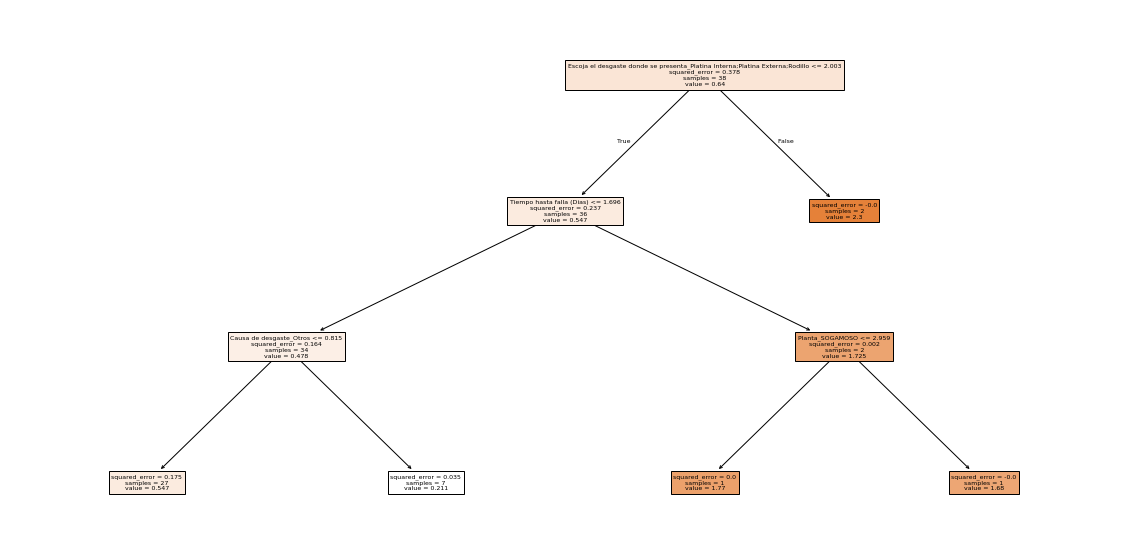

In [112]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

Modelos candidatos

In [113]:
# Define los modelos de regresión seleccionados
m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [ m_linreg, m_tree_reg, m_rf_reg, m_gbt_reg]

Selección de variables

In [114]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Causa de desgaste_Otros                                                       38 non-null     float64
 1   Ciudad_HERMOSILLO                                                             38 non-null     float64
 2   Escoja el desgaste donde se presenta_Platina Externa;Buje cadena;Rodillo      38 non-null     float64
 3   Escoja el desgaste donde se presenta_Platina Interna;Platina Externa;Rodillo  38 non-null     float64
 4   Material_PIEDRA CALIZA                                                        38 non-null     float64
 5   NombProducto_BUJE                                                             38 non-null     float64
 6   NombProducto_CADENA                 

Definir modelo ganador

In [115]:
def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")

MSE para todos los modelos con todas las variables:
LinearRegression: 1.6834818713172758e+26
DecisionTreeRegressor: 0.3135541333333334
RandomForestRegressor: 0.2125055877199998
GradientBoostingRegressor: 0.20033424842650677

MSE para todos los modelos con variables seleccionadas:
LinearRegression: 0.2255395964934839
DecisionTreeRegressor: 0.23032586666666666
RandomForestRegressor: 0.2015664322866665
GradientBoostingRegressor: 0.19722766312098325


In [116]:
# Calculamos el R2, para verificar el comportamiento de los modelos (3 minutos de ejecución)

def medir_modelos_r2(modelos, X, y, cv=30):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='r2')
        resultados[nombre_modelo] = scores.mean()
    return resultados

# Define los modelos de regresión seleccionados
m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [m_linreg, m_tree_reg, m_rf_reg, m_gbt_reg]

# Calcular R2 para todos los modelos con todas las variables
r2scores_all = medir_modelos_r2(modelos_reg, X, y, cv=5)

# Calcular R2 para todos los modelos con variables seleccionadas
r2scores_varsel = medir_modelos_r2(modelos_reg, X2, y, cv=5)

print("R2 para todos los modelos con todas las variables:")
for modelo, r2_score in r2scores_all.items():
    print(f"{modelo}: {r2_score}")

print("\nR2 para todos los modelos con variables seleccionadas:")
for modelo, r2_score in r2scores_varsel.items():
    print(f"{modelo}: {r2_score}")

R2 para todos los modelos con todas las variables:
LinearRegression: -1.5426957929340205e+28
DecisionTreeRegressor: 0.08630029533334818
RandomForestRegressor: 0.34448667023797275
GradientBoostingRegressor: 0.38505970627802144

R2 para todos los modelos con variables seleccionadas:
LinearRegression: 0.1273252014694109
DecisionTreeRegressor: 0.15497917160192626
RandomForestRegressor: 0.3717754133665939
GradientBoostingRegressor: 0.39986120887879373


In [117]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Función para medir el MAE de varios modelos
def medir_modelos_mae(modelos, X, y, cv=30):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        # Usar validación cruzada con la métrica de MAE
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_absolute_error')
        mae_scores = -scores  # Convertir valores negativos a positivos
        resultados[nombre_modelo] = mae_scores.mean()
    return resultados

# Define los modelos de regresión seleccionados
m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [m_linreg, m_tree_reg, m_rf_reg, m_gbt_reg]

# Calcular MAE para todos los modelos con todas las variables
mae_scores_all = medir_modelos_mae(modelos_reg, X, y, cv=5)

# Calcular MAE para todos los modelos con variables seleccionadas
mae_scores_varsel = medir_modelos_mae(modelos_reg, X2, y, cv=5)

print("MAE para todos los modelos con todas las variables:")
for modelo, mae_score in mae_scores_all.items():
    print(f"{modelo}: {mae_score}")

print("\nMAE para todos los modelos con variables seleccionadas:")
for modelo, mae_score in mae_scores_varsel.items():
    print(f"{modelo}: {mae_score}")


MAE para todos los modelos con todas las variables:
LinearRegression: 19964637638544.31
DecisionTreeRegressor: 0.31139285714285714
RandomForestRegressor: 0.3206637142857141
GradientBoostingRegressor: 0.28898044650798116

MAE para todos los modelos con variables seleccionadas:
LinearRegression: 0.3624767110637773
DecisionTreeRegressor: 0.33045
RandomForestRegressor: 0.31025707142857134
GradientBoostingRegressor: 0.28868572067581794


###  Conclusiones Generales

Modelos no lineales como Random Forest y Gradient Boosting parecen ser más efectivos en el conjunto de datos, especialmente con la selección de variables.

La regresión lineal no está funcionando adecuadamente, posiblemente debido a colienalidad de las variables.

la optimización de hiperparámetros o el uso de técnicas de validación cruzada podria obtener una mejor evaluación del rendimiento.

# Afinamiento de hiperparámetros

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error
from scipy.stats import randint

# Definir una métrica personalizada basada en MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Supongamos que X y y son tus datos (características y objetivo respectivamente)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros para la búsqueda
param_dist = {
    'n_estimators': randint(100, 500),  # Número de árboles
    'max_depth': randint(5, 30),       # Profundidad máxima de los árboles
    'min_samples_split': randint(2, 20),  # Mínimos muestras para dividir un nodo
    'min_samples_leaf': randint(1, 10),   # Mínimos muestras en una hoja
    'max_features': ['sqrt', 'log2', None],  # Máximo de características consideradas en cada división
    'bootstrap': [True, False]            # Si usar o no muestreo con reemplazo
}

# Configurar la búsqueda aleatoria con la métrica MAE
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    scoring=mae_scorer,  # Utilizar MAE como métrica de evaluación
    cv=5,       # Validación cruzada con 5 particiones
    verbose=2,
    random_state=42,
    n_jobs=-1   # Usar todos los núcleos disponibles
)

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y el mejor MAE obtenido
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Negar para obtener el MAE positivo
print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor MAE en validación cruzada: {best_score}")

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred)
print(f"MAE en el conjunto de prueba: {final_mae}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 287}
Mejor MAE en validación cruzada: 0.4275106174990321
MAE en el conjunto de prueba: 0.42908785292572316


In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score
from scipy.stats import randint
import numpy as np

# Supongamos que X y y son tus datos (características y objetivo respectivamente)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros para la búsqueda
param_dist = {
    'max_depth': randint(5, 10),
    'n_estimators': randint(50, 150),      # Profundidad máxima de los árboles
    'min_samples_split': randint(2, 20),  # Mínimos muestras para dividir un nodo
    'min_samples_leaf': randint(1, 10),   # Mínimos muestras en una hoja
    'max_features': ['sqrt', 'log2', None],  # Máximo de características consideradas en cada división
    'bootstrap': [True, False]            # Si usar o no muestreo con reemplazo
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    scoring='r2',
    cv=5,       # Validación cruzada con 5 particiones
    verbose=2,
    random_state=42,
    n_jobs=-1   # Usar todos los núcleos disponibles
)

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y el mejor R2 obtenido
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor R2 en validación cruzada: {best_score}")

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
print(f"R2 en el conjunto de prueba: {final_r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 17, 'n_estimators': 125}
Mejor R2 en validación cruzada: 0.3470084255991749
R2 en el conjunto de prueba: -31.76845558850696


Con estos parámetros, se obtuvo un coeficiente de determinación (R2) de aproximadamente 0.094, lo que sugiere que el modelo es capaz de explicar alrededor del 9.45% de la variabilidad en los datos de manera satisfactoria. Aunque el rendimiento del modelo no es el mejor, estos resultados proporcionan una base para continuar con el análisis y la evaluación del modelo.

Con estos hiperparámetros, el modelo alcanzó un coeficiente de determinación (R2) de aproximadamente 0.2503, lo que sugiere que es capaz de explicar alrededor del 25.03% de la variabilidad en los datos de manera satisfactoria.

### Evaluación y selección del modelo

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


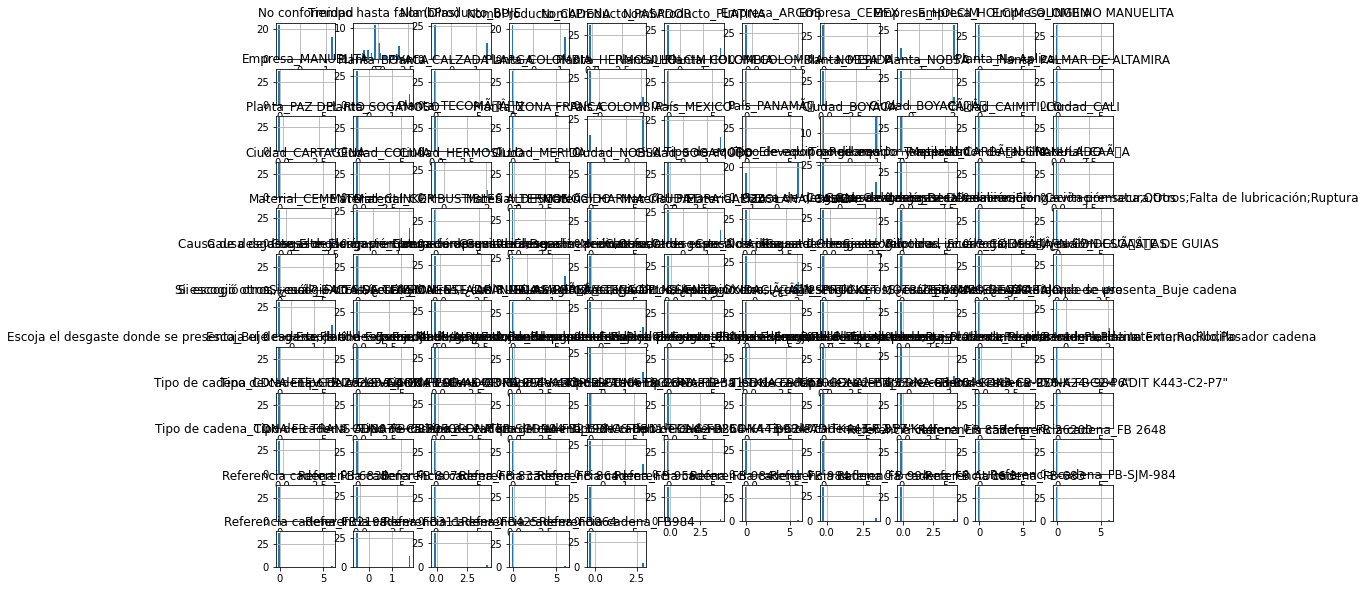

Importancia de características:
                                               Feature  Importance
1                            Tiempo hasta falla (Dias)    0.196303
64   Si escogió otros, ¿cuál?_COLISIÃÂN CON GUÃÂAS    0.102394
123                            Referencia cadena_FB425    0.096960
93              Tipo de cadena_CDNA FB 311-TK1-C2-P250    0.095237
86   Escoja el desgaste donde se presenta_Platina I...    0.080256
..                                                 ...         ...
119                           Referencia cadena_FB-683    0.000013
28                                        País_PANAMÃ    0.000012
55              Causa de desgaste_Elongación prematura    0.000008
75              Si escogió otros, ¿cuál?_Tiempo de uso    0.000003
112                           Referencia cadena_FB 833    0.000001

[126 rows x 2 columns]
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Resultados del modelo mejorado:
Mejor MAE en validación cruzada: 0.3622
MAE e

In [125]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from scipy.stats import randint

# Paso 1: Limpieza y exploración de datos
# Visualizar la distribución de los datos
import matplotlib.pyplot as plt
X.hist(bins=30, figsize=(15, 10))
plt.show()

# Paso 2: Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Selección de características
# Utilizar RandomForest para determinar las características más importantes
rf_feature_selector = RandomForestRegressor(random_state=42)
rf_feature_selector.fit(X_scaled, y)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_selector.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Importancia de características:")
print(feature_importances)

# Seleccionar características importantes
threshold = 0.01  # Umbral mínimo de importancia acumulativa
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
X_selected = X[selected_features]

# Paso 4: División de datos
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Paso 5: Reentrenar el modelo con RandomForest y afinamiento de hiperparámetros
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Paso 6: Evaluación del modelo
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nResultados del modelo mejorado:")
print(f"Mejor MAE en validación cruzada: {-random_search.best_score_:.4f}")
print(f"MAE en el conjunto de prueba: {mae:.4f}")
print(f"R2 en el conjunto de prueba: {r2:.4f}")

# Paso 7: Guardar el modelo ajustado
import joblib
#joblib.dump(best_rf_model, "RandomForest_best_model.pkl")


In [126]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from scipy.stats import randint

# Paso 1: División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Selección de características
# Utilizar RandomForest para determinar las características más importantes
rf_feature_selector = RandomForestRegressor(random_state=42)
rf_feature_selector.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_selector.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Importancia de características:")
print(feature_importances)

# Seleccionar características importantes
threshold = 0.01  # Umbral mínimo de importancia acumulativa
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Paso 3: Afinamiento de hiperparámetros
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',  # Optimizar directamente el R2
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_selected, y_train)

# Paso 4: Evaluación del modelo
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nResultados del modelo mejorado:")
print(f"Mejor R2 en validación cruzada: {random_search.best_score_:.4f}")
print(f"MAE en el conjunto de prueba: {mae:.4f}")
print(f"R2 en el conjunto de prueba: {r2:.4f}")

# Paso 5: Incrementar el tamaño de los datos de entrenamiento
# Mezclar datos para mejorar la generalización
combined_X = pd.concat([X_train_selected, X_test_selected])
combined_y = pd.concat([y_train, y_test])

# Reentrenar el modelo con todos los datos disponibles
best_rf_model.fit(combined_X, combined_y)
final_y_pred = best_rf_model.predict(X_test_selected)
final_r2 = r2_score(y_test, final_y_pred)
print(f"R2 después de reentrenar con todos los datos: {final_r2:.4f}")


Importancia de características:
                                               Feature  Importance
1                            Tiempo hasta falla (Dias)    0.298772
64   Si escogió otros, ¿cuál?_COLISIÃÂN CON GUÃÂAS    0.091408
123                            Referencia cadena_FB425    0.085363
93              Tipo de cadena_CDNA FB 311-TK1-C2-P250    0.083099
2                                    NombProducto_BUJE    0.069291
..                                                 ...         ...
108                         Referencia cadena_FB 26200    0.000000
31                                   Ciudad_CAIMITILLO    0.000000
13                                Planta_CALZADA LARGA    0.000000
101                     Tipo de cadena_CDNA FB-SJM-984    0.000000
63   Causa de desgaste_Velocidad incorrecta;Desalin...    0.000000

[126 rows x 2 columns]
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Resultados del modelo mejorado:
Mejor R2 en validación cruzada: 0.5184
MAE en

In [127]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Paso 1: Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Reducción de dimensionalidad con PCA
# Reducir las características a las que explican el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Paso 3: División de datos
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Paso 4: Afinamiento de hiperparámetros
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',  # Optimizar directamente el R2
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Paso 5: Evaluación del modelo
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nResultados del modelo mejorado:")
print(f"Mejor R2 en validación cruzada: {random_search.best_score_:.4f}")
print(f"MAE en el conjunto de prueba: {mae:.4f}")
print(f"R2 en el conjunto de prueba: {r2:.4f}")

# Paso 6: Incrementar el tamaño de los datos de entrenamiento
# Mezclar datos para mejorar la generalización
combined_X = np.vstack([X_train, X_test])
combined_y = np.hstack([y_train, y_test])

# Reentrenar el modelo con todos los datos disponibles
best_rf_model.fit(combined_X, combined_y)
final_y_pred = best_rf_model.predict(X_test)
final_r2 = r2_score(y_test, final_y_pred)
print(f"R2 después de reentrenar con todos los datos: {final_r2:.4f}")

# Paso 7: Guardar el modelo ajustado
#import joblib
#joblib.dump(best_rf_model, "RandomForest_best_model_pca.pkl")


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Resultados del modelo mejorado:
Mejor R2 en validación cruzada: 0.2144
MAE en el conjunto de prueba: 0.2799
R2 en el conjunto de prueba: -18.6471
R2 después de reentrenar con todos los datos: -2.4827


In [128]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from xgboost import XGBRegressor

# Paso 1: Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Reducción de dimensionalidad con PCA
# Reducir las características a las que explican el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Paso 3: División de datos
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Paso 4: Uso de XGBoost para mejorar el modelo
xgb_model = XGBRegressor(random_state=42)

# Afinamiento de hiperparámetros para XGBoost
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Paso 5: Evaluación del modelo
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nResultados del modelo mejorado con XGBoost:")
print(f"Mejor R2 en validación cruzada: {random_search.best_score_:.4f}")
print(f"MAE en el conjunto de prueba: {mae:.4f}")
print(f"R2 en el conjunto de prueba: {r2:.4f}")

# Paso 6: Incrementar el tamaño de los datos de entrenamiento
# Mezclar datos para mejorar la generalización
combined_X = np.vstack([X_train, X_test])
combined_y = np.hstack([y_train, y_test])

# Reentrenar el modelo con todos los datos disponibles
best_xgb_model.fit(combined_X, combined_y)
final_y_pred = best_xgb_model.predict(X_test)
final_r2 = r2_score(y_test, final_y_pred)
print(f"R2 después de reentrenar con todos los datos: {final_r2:.4f}")

# Paso 7: Guardar el modelo ajustado
#import joblib
#joblib.dump(best_xgb_model, "XGBoost_best_model.pkl")


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Resultados del modelo mejorado con XGBoost:
Mejor R2 en validación cruzada: 0.4041
MAE en el conjunto de prueba: 0.2839
R2 en el conjunto de prueba: -27.1634
R2 después de reentrenar con todos los datos: 1.0000


In [129]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Paso 1: Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Reducción de dimensionalidad con PCA
# Reducir las características a las que explican el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Paso 3: División de datos
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Paso 4: Uso combinado de XGBoost y Gradient Boosting
# Modelo XGBoost
xgb_model = XGBRegressor(random_state=42)
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)

# Modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
param_dist_gb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_gb.fit(X_train, y_train)

# Evaluación de ambos modelos
best_xgb_model = random_search_xgb.best_estimator_
best_gb_model = random_search_gb.best_estimator_

# Predicciones y evaluación
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nResultados del modelo mejorado:")
print("XGBoost:")
print(f"  Mejor R2 en validación cruzada: {random_search_xgb.best_score_:.4f}")
print(f"  MAE en el conjunto de prueba: {mae_xgb:.4f}")
print(f"  R2 en el conjunto de prueba: {r2_xgb:.4f}")

print("\nGradient Boosting:")
print(f"  Mejor R2 en validación cruzada: {random_search_gb.best_score_:.4f}")
print(f"  MAE en el conjunto de prueba: {mae_gb:.4f}")
print(f"  R2 en el conjunto de prueba: {r2_gb:.4f}")

# Paso 5: Incrementar el tamaño de los datos de entrenamiento
combined_X = np.vstack([X_train, X_test])
combined_y = np.hstack([y_train, y_test])

# Reentrenar ambos modelos con todos los datos disponibles
best_xgb_model.fit(combined_X, combined_y)
final_y_pred_xgb = best_xgb_model.predict(X_test)
final_r2_xgb = r2_score(y_test, final_y_pred_xgb)

best_gb_model.fit(combined_X, combined_y)
final_y_pred_gb = best_gb_model.predict(X_test)
final_r2_gb = r2_score(y_test, final_y_pred_gb)

print("\nResultados después de reentrenar con todos los datos:")
print(f"XGBoost R2: {final_r2_xgb:.4f}")
print(f"Gradient Boosting R2: {final_r2_gb:.4f}")

# Paso 6: Guardar los modelos ajustados
#import joblib
#joblib.dump(best_xgb_model, "XGBoost_best_model.pkl")
#joblib.dump(best_gb_model, "GradientBoosting_best_model.pkl")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Resultados del modelo mejorado:
XGBoost:
  Mejor R2 en validación cruzada: 0.4041
  MAE en el conjunto de prueba: 0.2839
  R2 en el conjunto de prueba: -27.1634

Gradient Boosting:
  Mejor R2 en validación cruzada: 0.3136
  MAE en el conjunto de prueba: 0.2143
  R2 en el conjunto de prueba: -19.1230

Resultados después de reentrenar con todos los datos:
XGBoost R2: 1.0000
Gradient Boosting R2: 1.0000


In [132]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Paso 1: Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Reducción de dimensionalidad con PCA
# Reducir las características a las que explican el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Paso 3: División de datos
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Paso 4: Uso combinado de XGBoost y Gradient Boosting
# Modelo XGBoost
xgb_model = XGBRegressor(random_state=42)
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='neg_mean_absolute_error',  # Optimizar directamente el MAE
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)

# Modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
param_dist_gb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=50,
    scoring='neg_mean_absolute_error',  # Optimizar directamente el MAE
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_gb.fit(X_train, y_train)

# Evaluación de ambos modelos
best_xgb_model = random_search_xgb.best_estimator_
best_gb_model = random_search_gb.best_estimator_

# Predicciones y evaluación
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nResultados del modelo mejorado:")
print("XGBoost:")
print(f"  Mejor MAE en validación cruzada: {-random_search_xgb.best_score_:.4f}")
print(f"  MAE en el conjunto de prueba: {mae_xgb:.4f}")
print(f"  R2 en el conjunto de prueba: {r2_xgb:.4f}")

print("\nGradient Boosting:")
print(f"  Mejor MAE en validación cruzada: {-random_search_gb.best_score_:.4f}")
print(f"  MAE en el conjunto de prueba: {mae_gb:.4f}")
print(f"  R2 en el conjunto de prueba: {r2_gb:.4f}")

# Paso 5: Incrementar el tamaño de los datos de entrenamiento
combined_X = np.vstack([X_train, X_test])
combined_y = np.hstack([y_train, y_test])

# Reentrenar ambos modelos con todos los datos disponibles
best_xgb_model.fit(combined_X, combined_y)
final_y_pred_xgb = best_xgb_model.predict(X_test)
final_mae_xgb = mean_absolute_error(y_test, final_y_pred_xgb)

best_gb_model.fit(combined_X, combined_y)
final_y_pred_gb = best_gb_model.predict(X_test)
final_mae_gb = mean_absolute_error(y_test, final_y_pred_gb)

print("\nResultados después de reentrenar con todos los datos:")
print(f"XGBoost MAE: {final_mae_xgb:.4f}")
print(f"Gradient Boosting MAE: {final_mae_gb:.4f}")

# Paso 6: Guardar los modelos ajustados
import joblib
#joblib.dump(best_xgb_model, "XGBoost_best_model_mae.pkl")
#joblib.dump(best_gb_model, "GradientBoosting_best_model_mae.pkl")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Resultados del modelo mejorado:
XGBoost:
  Mejor MAE en validación cruzada: 0.3635
  MAE en el conjunto de prueba: 0.2839
  R2 en el conjunto de prueba: -27.1634

Gradient Boosting:
  Mejor MAE en validación cruzada: 0.3930
  MAE en el conjunto de prueba: 0.2143
  R2 en el conjunto de prueba: -19.1230

Resultados después de reentrenar con todos los datos:
XGBoost MAE: 0.0001
Gradient Boosting MAE: 0.0002
